# Homework #3 Programming Assignment
CSCI567, Spring 2019<br>Victor Adamchik<br>**Due: 11:59 pm, March 3rd 2019**


### Before you start: 
On Vocareum, when you submit your homework, it takes around 5-6 minutes to run the grading scripts and evaluate your code. So, please be patient regarding the same.<br>


## Office Hour for Project Assignment 3
Office hours for Anirudh: <br>
February 15th, 2pm - 3pm<br>
February 22nd, 2pm - 3pm<br>
March 1st, 2pm - 4pm<br>
<br>
Office hours for Piyush:<br>
February 13th, 2pm - 3pm<br>
February 21nd, 2pm - 3pm<br>
March 4th, 2pm - 4pm<br>
<br>
Also, you can post your question on Piazza under pa-3 folder. We will try our best to answer all questions as soon as possible. Please make sure you read previous posts before creating a new post in case your question has been answered before. However, if you have any urgent issue, please feel free to send an email to both of us. <br>
Anirudh, Kashi: kashia@usc.edu<br>
Piyush, Umate: pumate@usc.edu<br>



## Problem 1 Neural Networks (40 points)
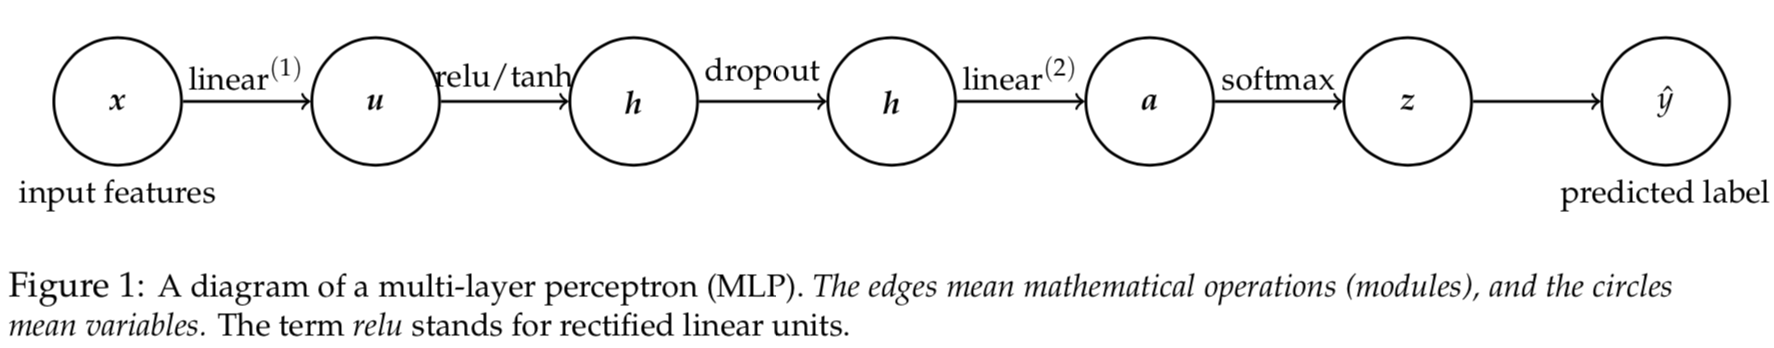
<br><br>
For this Assignment, you are asked to implement neural networks. We will be using this neural network to classify MNIST database of handwritten digits (0-9). The architecture of the multi-layer perceptron (MLP, just another term for fully connected feedforward networks we discussed in the lecture) you will be implementing is shown in figure 1. Following MLP is designed for a K-class classification problem. 

Let $(x\in\mathbb{R}^D, y\in\{1,2,\cdots,K\})$ be a labeled instance, such an MLP performs the following computations.
<br><br><br><br>
$$
\begin{align}
 \textbf{input features}: \hspace{15pt} & x \in \mathbb{R}^D \\
 \textbf{linear}^{(1)}: \hspace{15pt} & u = W^{(1)}x + b^{(1)} \hspace{2em}, W^{(1)} \in \mathbb{R}^{M\times D} \text{ and } b^{(1)} \in \mathbb{R}^{M}  \label{linear_forward}\\
 \textbf{tanh}:\hspace{15pt} & h =\cfrac{2}{1+e^{-2u}}-1 \label{tanh_forward}\\
 \textbf{relu}: \hspace{15pt} & h = max\{0, u\} =
\begin{bmatrix}
\max\{0, u_1\}\\
\vdots \\
\max\{0, u_M\}\\
\end{bmatrix} \label{relu_forward}\\
 \textbf{linear}^{(2)}: \hspace{15pt} & a = W^{(2)}h + b^{(2)} \hspace{2em}, W^{(2)} \in \mathbb{R}^{K\times M} \text{ and } b^{(2)} \in \mathbb{R}^{K} \label{linear2_forward}\\
 \textbf{softmax}: \hspace{15pt} & z = \begin{bmatrix}
\cfrac{e^{a_1}}{\sum_{k} e^{a_{k}}}\\
\vdots \\
\cfrac{e^{a_K}}{\sum_{k} e^{a_{k}}} \\
\end{bmatrix}\\
 \textbf{predicted label}: \hspace{15pt} & \hat{y} = argmax_k z_k.
%& l = -\sum_{k} y_{k}\log{\hat{y_{k}}} \hspace{2em}, \vy \in \mathbb{R}^{k} \text{ and } y_k=1 \text{ if } \vx \text{ belongs to the } k' \text{-th class}.
\end{align}
$$


For a $K$-class classification problem, one popular loss function for training (i.e., to learn $W^{(1)}$, $W^{(2)}$, $b^{(1)}$, $b^{(2)}$) is the cross-entropy loss.
Specifically we denote the cross-entropy loss with respect to the training example $(x, y)$ by $l$:
<br><br>
$$
\begin{align}
  l = -\log (z_y) = \log \left( 1 + \sum_{k\neq y} e^{a_k - a_y} \right)
\end{align}
$$
<br><br>
Note that one should look at $l$ as a function of the parameters of the network, that is, $W^{(1)}, b^{(1)}, W^{(2)}$ and $b^{(2)}$.
For ease of notation, let us define the one-hot (i.e., 1-of-$K$) encoding of a class $y$ as

\begin{align}
y \in \mathbb{R}^K \text{ and }
y_k =
\begin{cases}
1, \text{ if }y = k,\\
0, \text{ otherwise}.
\end{cases} 
\end{align}
so that
\begin{align} 
l = -\sum_{k} y_{k}\log{z_k} = 
-y^T
\begin{bmatrix}
\log z_1\\
\vdots \\
\log z_K\\
\end{bmatrix}
= -y^T\log{z}.
\end{align}

We can then perform error-backpropagation, a way to compute partial derivatives (or gradients) w.r.t the parameters of a neural network, and use gradient-based optimization to learn the parameters.  


Submission: All you need to submit is neural_networks.py

### Q1.1 Mini batch Gradient Descent 
First, You need to implement mini-batch gradient descent which is a gradient-based optimization to learn the parameters of the neural network. 
<br>
$$
\begin{align}
\upsilon = \alpha \upsilon - \eta \delta_t\\
w_t = w_{t-1} + \upsilon
\end{align}
$$
<br>
You can use the formula above to update the weights using momentum. <br>
Here,
$\alpha$ is the discount factor such that $\alpha \in (0, 1)$ <br>
$\upsilon$ is the velocity update<br>
$\eta$ is the learning rate<br>
$\delta_t$ is the gradient<br>

You need to handle with as well without momentum scenario in the ```miniBatchGradientDescent``` function.

* ```TODO 1```
You need to complete ```def miniBatchGradientDescent(model, momentum, _lambda, _alpha, _learning_rate)``` in ```neural_networks.py```

### Q1.2 Linear Layer (10 points)
Second, You need to implement the linear layer of MLP. In this part, you need to implement 3 python functions in ```class linear_layer```. In ```def __init__(self, input_D, output_D)``` function, you need to initialize W with random values using np.random.normal such that the mean is 0 and standard deviation is 0.1. You also need to initialize gradients to zeroes in the same function. 

$$
\begin{align}
\text{forward pass:}\hspace{2em} &
u = \text{linear}^{(1)}\text{.forward}(x) = W^{(1)}x + b^{(1)},\\
&\text{where } W^{(1)} \text{ and } b^{(1)} \text{ are its parameters.}\nonumber\\ 
\nonumber\\
\text{backward pass:}\hspace{2em} &[\frac{\partial l}{\partial x}, \frac{\partial l}{\partial W^{(1)}}, \frac{\partial l}{\partial b^{(1)}}] = \text{linear}^{(1)}\text{.backward}(x, \frac{\partial l}{\partial u}).
\end{align}
$$

You can use the above formula as a reference to implement the ```def forward(self, X)``` forward pass and ```def backward(self, X, grad)``` backward pass in class linear_layer. In backward pass, you only need to return the backward_output. You also need to compute gradients of W and b in backward pass. 

* ```TODO 2```
You need to complete ```def __init__(self, input_D, output_D)``` in ```class linear_layer``` of ```neural_networks.py```
* ```TODO 3```
You need to complete ```def forward(self, X)``` in ```class linear_layer``` of  ```neural_networks.py```
* ```TODO 4```
You need to complete ```def backward(self, X, grad)``` in ```class linear_layer``` of  ```neural_networks.py```

### Q1.3 Activation function - tanh (10 points)
Now, you need to implement the activation function tanh. In this part, you need to implement 2 python functions in ```class tanh```. In ```def forward(self, X)```, you need to implement the forward pass and you need to compute the derivative and accordingly implement ```def backward(self, X, grad)```, i.e. the backward pass.
$$
\begin{align}
\textbf{tanh}:\hspace{15pt} & h =\cfrac{2}{1+e^{-2u}}-1\\
\end{align}
$$
You can use the above formula for tanh as a reference.
* ```TODO 5```
You need to complete ```def forward(self, X)``` in ```class tanh``` of  ```neural_networks.py```
* ```TODO 6```
You need to complete ```def backward(self, X, grad)``` in ```class tanh``` of  ```neural_networks.py```




### Q1.4 Activation function - relu (10 points)
You need to implement another activation function called relu. In this part, you need to implement 2 python functions in ```class relu```. In ```def forward(self, X)```, you need to implement the forward pass and you need to compute the derivative and accordingly implement ```def backward(self, X, grad)```, i.e. the backward pass.
$$
\begin{align}
\textbf{relu}: \hspace{15pt} & h = max\{0, u\} =
\begin{bmatrix}
\max\{0, u_1\}\\
\vdots \\
\max\{0, u_M\}\\
\end{bmatrix}
\end{align}
$$
You can use the above formula for relu as a reference.
* ```TODO 7```
You need to complete ```def forward(self, X)``` in ```class relu``` of  ```neural_networks.py```
* ```TODO 8```
You need to complete ```def backward(self, X, grad)``` in ```class relu``` of  ```neural_networks.py```



### Q1.5 Dropout (10 points)
To prevent overfitting, we usually add regularization. Dropout is another way of handling overfitting. In this part, you will initially read and understand ```def forward(self, X, is_train)``` i.e. the forward pass of ```class dropout``` and derive partial derivatives accordingly to implement ```def backward(self, X, grad)``` i.e. the backward pass of ```class dropout```. We define the forward and the backward passes as follows.

\begin{align}
\text{forward pass:}\hspace{2em} &
{s} = \text{dropout}\text{.forward}({q}\in\mathbb{R}^J) = \frac{1}{1-r}\times
\begin{bmatrix}
\textbf{1}[p_1 >= r] \times q_1\\
\vdots \\
\textbf{1}[p_J >= r] \times q_J\\
\end{bmatrix},
\\
\nonumber\\
&\text{where } p_j \text{ is sampled uniformly from }[0, 1), \forall j\in\{1,\cdots,J\}, \nonumber\\
&\text{and } r\in [0, 1) \text{ is a pre-defined scalar named dropout rate}.
\end{align}
\begin{align}
\text{backward pass:}\hspace{2em} &\frac{\partial l}{\partial {q}} = \text{dropout}\text{.backward}({q}, \frac{\partial l}{\partial {s}})=
\frac{1}{1-r}\times
\begin{bmatrix}
\textbf{1}[p_1 >= r] \times \cfrac{\partial l}{\partial s_1}\\
\vdots \\
\textbf{1}[p_J >= r] \times \cfrac{\partial l}{\partial s_J}\\
\end{bmatrix}.
\end{align}

Note that $p_j, j\in\{1,\cdots,J\}$ and $r$ are not be learned so we do not need to compute the derivatives w.r.t. to them. Moreover, $p_j, j\in\{1,\cdots,J\}$ are re-sampled every forward pass, and are kept for the following backward pass. The dropout rate $r$ is set to 0 during testing.

* ```TODO 9```
You need to complete ```def backward(self, X, grad)``` in ```class dropout``` of  ```neural_networks.py```

### Q1.6 Connecting the dots
In this part, you will combine the modules written from question Q1.1 to Q1.5 by implementing TODO snippets in the ```def main(main_params, optimization_type="minibatch_sgd")``` i.e. main function. After implementing forward and backward passes of MLP layers in Q1.1 to Q1.5,now in the main function you will call the forward methods and backward methods of every layer in the model in an appropriate order based on the architecture.

* ```TODO 10```
You need to complete ```main(main_params, optimization_type="minibatch_sgd")``` in ```neural_networks.py```



### Grading
Your code will be graded on Vocareum with autograding script. For your reference, the solution code takes around 5 minutes to execute. As long as your code can finish grading on Vocareum, you should be good. When you finish all ```TODO``` parts, please click submit button on Vocareum. Sometimes you may need to come back to check grading report later.

Your code will be tested on the correctness of modules you have implemented as well as certain custom testcases. 40 points are assigned for Question 1 while 60 points are assigned to custom testcases.